# Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Source Files

Source Generation Script:

In [3]:
sampleinfo = pd.read_csv("../chr21Example/igsr_samples.tsv", sep="\t")
source_prefix = "../chr21Example/chr21-test.pruned.thinned"

In [4]:
sample_to_pop = dict(zip(list(sampleinfo["Sample name"]), list(sampleinfo["Population code"])))

samples = [line.split()[0] for line in open(source_prefix+".fam", "r").readlines()]
pops = [sample_to_pop.get(item, "NA") for item in samples]

In [17]:
def plotAdmixture(output_Q):
    fig = plt.figure()
    fig.set_size_inches((10, 8))

    plotind = 1
    K = 3

    ax = fig.add_subplot(3, 1, plotind)

    data = pd.read_csv(output_Q, delim_whitespace=True, header=None)
    cols = list(data.columns)
    data["sample"] = samples
    data["pop"] = pops
    data = data.sort_values(["pop"]+cols)
    data.plot.bar(stacked=True, ax=ax, width=1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    # Only plot label for first sample in each pop
    xticklabels = []
    currpop = ""
    for i in range(data.shape[0]):
        if data["pop"].values[i] == currpop:
            xticklabels.append("")
        else:
            xticklabels.append(data["pop"].values[i])
            currpop = data["pop"].values[i]
    ax.set_xticklabels(xticklabels)

    plotind += 1
    return fig

## wf-admixture Example

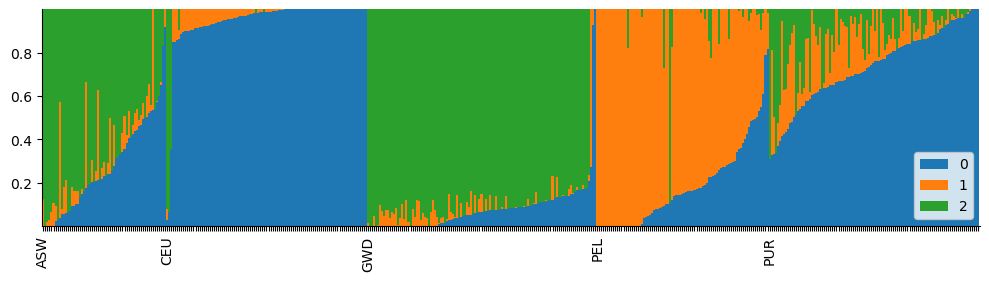

In [18]:
output_Q = "../chr21Example/admixture-benchmark/chr21-test.pruned.thinned.wf-admixture.Q"
fig = plotAdmixture(output_Q)
fig.tight_layout()
fig.savefig("wf-admixture.png")

## admixture Example

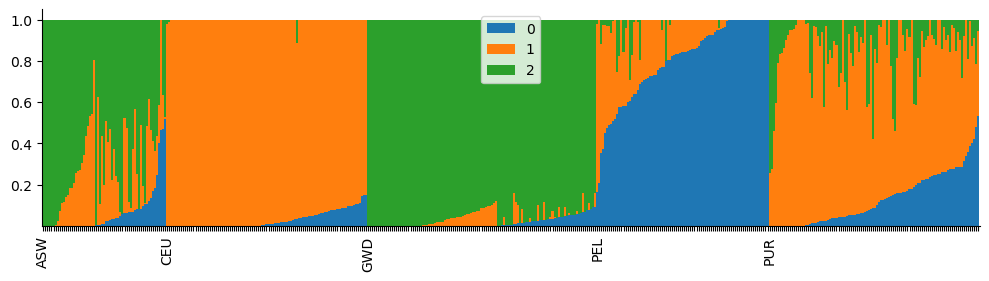

In [19]:
output_Q = "../chr21Example/admixture-benchmark/chr21-test.pruned.thinned.3.Q"
fig = plotAdmixture(output_Q)
fig.tight_layout()
fig.savefig("admixture.png")